Import lab and data sets

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#from scipy.io import loadmat
import tensorflow as tf
tf.random.set_seed(3 )
import seaborn as sns
# import cv2
from tensorflow import keras 
from keras.datasets import mnist
from tensorflow.math import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten , Dropout
#data = loadmat('mnist-original.mat')


data and pre-process it

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape , y_train.shape , X_test.shape , y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data = 60,000 images

Test data = 10,000 images

Image dimensions -> 28x28

Grayscale -> 1 channel (no rgb)

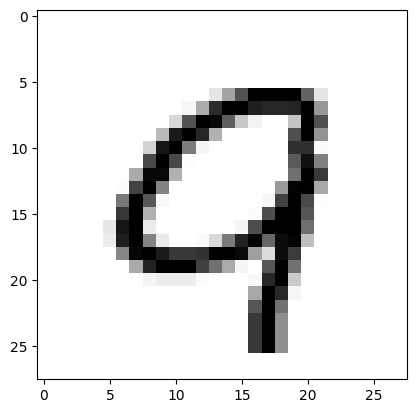

9


In [4]:
plt.imshow(X_train[3000],cmap= 'binary')
plt.show()

print(y_train[3000])

In [5]:
print (y_train.shape,y_test.shape)

(60000,) (10000,)


In [6]:
#unique values in y-train
print(np.unique(y_train))
#unique values in y-test
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [ ]:
def plot_input_imp(i):
    plt.imshow(X_train[i] , cmap= 'binary')
    plt.title(y_train[i])
    plt.show()

We can use these labels as such or we can apply One Hot Encoding

All the images have the same dimension in this dataset, if not, we have to resize all the images to a common dimension

In [ ]:
for i in range(10):
    plot_input_imp(i)

In [ ]:
#Pre Process yhe images
#normalizing the image to[0,1] range
X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255

#Reshape / expand the dimentions of images to (28,28,1)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

#convert classes to one hot vectors

y_train = keras.utils.to_categorical(y_train)

y_test = keras.utils.to_categorical(y_test)

In [ ]:
# Setting up the layers of the neural network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,)
])

In [ ]:
X_train.shape

In [ ]:
y_train

In [ ]:
model = Sequential()

model.add(Conv2D(32 , (3,3), input_shape = (28,28,1) , activation = 'relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, (3,3) , activation= 'relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dropout(0.25))
model.add(Dense(10, activation="softmax"))

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer= 'adam' , loss = keras.losses.categorical_crossentropy , metrics=['accuracy'])

In [ ]:
#callbacks
from keras.callbacks import EarlyStopping, ModelCheckpoint

#Earlystopping
#es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01, patience= 4, verbose= 1)
#ModelCheckpoint

mc = ModelCheckpoint('./bestmodel.h5', monitor= 'val_accuracy', verbose= 1, save_best_only= True)


cb = [mc]

Model Training

In [ ]:
his = model.fit(X_train, y_train, epochs = 3, validation_split= 0.3 , callbacks = cb)

In [ ]:
model_S = keras.models.load_model("D://SY_AI_A_5_Handwritten-Digit-Recognition-main//bestmodel.h5")

In [ ]:
score = model_S.evaluate(X_test, y_test)

print(f" the model accuracy is {score[1]}")